In [ ]:
#https://creativecommons.org/licenses/by/4.0/

This file aims at creating a useful pandas-based dataframework for each subject.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scipy.io
import pandas as pd
from glob import glob
import os
import time
from scipy import signal
import csv

Channels and sampling frequency

In [2]:
fs = 2048 #Hz, sampling frequency
n_ch = 8 #channles in one row (or column) of one set
n_ch_tot = (n_ch**2)*3 #total channels

## Subject 1

Create dataframe

In [3]:
columns = ['task','trial',
           'set1','set2','set3',
          't_steps', 'time_duration']#,
           #'info', 'side','gain','filt_parameters','notes']
        #to add further info

#add channels as predictors

for i in range(n_ch_tot):
    columns.append('ch'+str(i+1),)

df = pd.DataFrame(columns=columns)

ch_col = df.columns[ df.columns.get_loc('ch1') : df.columns.get_loc('ch1') + n_ch_tot]

In [4]:
task_names = [#'iso',
              'bottle',
              'screw',
              'knife',
              'hammer',
              'peg',
              #'free_eating',
              'jar', 
              'typing']
              #'swing']

Load all files from subject 1

In [5]:
file_list = []
task_list_name = []
task_list_num = []

for task_num, task_name in enumerate(task_names):
    
    file_list_temp = glob(os.path.join('20181024_KONSENS_recordings/S1/', '*'+task_name+'*.mat'))
    file_list.extend(file_list_temp)
    task_list_name.extend((task_name,)*np.size(file_list_temp))
    task_list_num.extend(range(np.size(file_list_temp)))
                      
for file_num, file_name in enumerate(file_list):
    print (file_name) #print loaded files
    mat = scipy.io.loadmat(file_name)
    set1_temp = np.array(mat["EMG_array"][0][0]['data'][0][0]) #first or second index? check with trial 1
    set2_temp = np.array(mat["EMG_array"][0][1]['data'][0][0])
    set3_temp = np.array(mat["EMG_array"][0][2]['data'][0][0])
        
    set1 = [] #batches to reshape data in 64 x time_steps matrices
    set2 = []
    set3 = []
        
    for i in range(n_ch):
        for j in range(n_ch):
            set1.append(np.squeeze(set1_temp[i][j]))
            set2.append(np.squeeze(set2_temp[i][j]))
            set3.append(np.squeeze(set3_temp[i][j]))
            
    #ch = []
    #ch.append(np.concatenate((set1, set2, set3),axis=0))
    #ch = np.squeeze(ch)
    
    #for i in range(n_ch_tot):
    #    df = df.append({'ch'+str(1+i): ch[i]}, ignore_index=True)
        
    df = df.append({'set1': set1, 'set2': set2, 'set3': set3,
                    't_steps': np.size(mat["EMG_array"][0][0]['data'][0][0][0][0])},
                    #'time_duration': time.strftime('%M:%S', time.localtime((df['t_steps'].loc[file_num])/fs))},
                    ignore_index=True)

df['task'] = task_list_name
df['trial'] = task_list_num

20181024_KONSENS_recordings/S1\400SaAlSt181024115903_bottle1.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115904_bottle2.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115905_bottle3.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115906_bottle4.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115907_bottle5.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115908_screw1.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115909_screw2.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115910_screw3.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115911_screw4.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115912_screw5.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115914_knife1.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115915_knife2.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115916_knife3.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115918_knife4.mat
20181024_KONSENS_recordings/S1\400SaAlSt181024115919_knife5.mat
20181024_KONSENS_recordings/S1\400S

Add time duration

In [6]:
#time_duration = []
#for i in df.index:
    #time_duration.append(time.strftime('%M:%S', time.localtime((df['t_steps'].loc[i])/fs)))
#df['time_duration'] = time_duration
df['time_duration'] = (df['t_steps']/fs).astype(int)

Adding single channels as predictors

In [21]:
ch = []

for j in df.index:
    set1 = df.loc[:].set1[j]
    set2 = df.loc[:].set2[j]
    set3 = df.loc[:].set3[j]
    
    ch.append((np.concatenate((set1, set2, set3),axis=0)).T)

    df.loc[j, ch_col.tolist()] = ch[j]

In [22]:
df

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
0,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,20,"[31.964615359478973, 24.269801683286467, 10.47...","[70.8259532625527, 73.82637791170832, 65.31792...","[44.09180003120065, 51.99712342376652, 54.8851...",...,"[32.014310866349334, 37.89572775838348, 43.132...","[36.18811922942984, 40.42455051686394, 43.8298...","[33.94513046412873, 40.33488803190266, 45.7318...","[37.021993516670264, 41.36081282439563, 44.214...","[38.071402636414255, 40.91635450529141, 42.463...","[35.618345917278745, 40.865701779838396, 44.29...","[35.3952467210484, 38.163549581050404, 39.2195...","[34.18176269068243, 39.010867877898164, 42.749...","[36.14109196260486, 42.358864684447724, 47.325...","[36.452586693268024, 41.8069240315174, 45.9303..."
1,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,22,"[-15.289480214873088, -24.358911222730487, -29...","[-9.186636581329818, -1.249371629179131, 11.07...","[13.967951155654486, 28.16728594329084, 39.746...",...,"[12.880016569463024, 26.775623405781356, 37.65...","[13.225561678690152, 29.51211066898281, 43.462...","[0.9751764005646775, 16.106089842944396, 30.11...","[5.820415219237693, 20.387659879850577, 34.203...","[4.551810861860666, 17.795329631041604, 30.331...","[9.405133545586127, 23.15618431077741, 35.2855...","[5.07345780353531, 21.50037923865052, 36.34853...","[6.483494471303161, 22.827151022421603, 37.436...","[8.084014180050525, 23.641945875157347, 37.387...","[9.386822096008913, 25.261353365036765, 39.193..."
2,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,20,"[50.81990128240624, 40.19192250794237, 18.7769...","[-14.657540556235439, -24.42362569090333, -36....","[-66.61334830262629, -66.8911027439674, -61.22...",...,"[-57.777024462341856, -58.77194857282905, -53....","[-53.26697126703712, -55.65123403055061, -51.8...","[-52.17012283928934, -51.8195532467, -47.05403...","[-48.772452760154756, -51.11591880614994, -48....","[-48.606641854281705, -50.539465064901435, -47...","[-49.16066811649601, -50.4350675590588, -46.36...","[-49.257047559450214, -50.264085925869395, -46...","[-55.02215368329985, -56.23905539392281, -51.8...","[-53.07313775275914, -53.23005708726512, -47.9...","[-52.547735967317095, -53.506827330157144, -47..."
3,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,16,"[-22.934922896595662, -7.439911506444014, 10.1...","[-35.767343769830404, -32.03703437248215, -24....","[-14.281930836002765, -32.659777280930435, -48...",...,"[-16.397763966499937, -26.750730960492945, -36...","[-20.521858795505782, -32.315444433995424, -42...","[-10.63964292484446, -20.492447825455336, -29....","[-20.350938425806945, -28.046156132869204, -34...","[-18.63594023457675, -24.651664220721614, -30....","[-16.511019842866535, -26.343744755173294, -35...","[-15.23459445154053, -24.16275296636875, -32.5...","[-16.631506608693815, -25.884554489223117, -34...","[-18.894502433398955, -27.984107746967815, -36...","[-15.464156061368815, -26.541669816950318, -37..."
4,bottle,4,"[[15.463021554432862, 21.592153773681915, 20.4...","[[48.01097659029343, 52.66099576912187, 53.934...","[[-3.349122162031625, -3.2404213883818302, -2....",34279,16,"[15.463021554432862, 21.592153773681915, 20.40...","[62.81411151900402, 71.84219247009132, 68.4156...","[24.66074160101367, 24.601751460002617, 26.740...",...,"[27.588132866322375, 31.610190648164778, 35.57...","[21.684420265339057, 25.148378492690274, 30.08...","[41.644911

Example to locate knife trials on original dataframe:

In [23]:
df[df.task=='bottle']

,task,trial,set1,set2,set3,t_steps,time_duration,ch1,ch2,ch3,...,ch183,ch184,ch185,ch186,ch187,ch188,ch189,ch190,ch191,ch192
0,bottle,0,"[[31.964615359478973, 24.269801683286467, 10.4...","[[0.4660012849560173, 11.38627444309726, 29.55...","[[32.77140204814666, 37.933860009324206, 46.75...",41939,20,"[31.964615359478973, 24.269801683286467, 10.47...","[70.8259532625527, 73.82637791170832, 65.31792...","[44.09180003120065, 51.99712342376652, 54.8851...",...,"[32.014310866349334, 37.89572775838348, 43.132...","[36.18811922942984, 40.42455051686394, 43.8298...","[33.94513046412873, 40.33488803190266, 45.7318...","[37.021993516670264, 41.36081282439563, 44.214...","[38.071402636414255, 40.91635450529141, 42.463...","[35.618345917278745, 40.865701779838396, 44.29...","[35.3952467210484, 38.163549581050404, 39.2195...","[34.18176269068243, 39.010867877898164, 42.749...","[36.14109196260486, 42.358864684447724, 47.325...","[36.452586693268024, 41.8069240315174, 45.9303..."
1,bottle,1,"[[-15.289480214873088, -24.358911222730487, -2...","[[14.598420356887015, 22.830881966196422, 28.9...","[[2.590055412997521, -3.51933027930656, -9.343...",45428,22,"[-15.289480214873088, -24.358911222730487, -29...","[-9.186636581329818, -1.249371629179131, 11.07...","[13.967951155654486, 28.16728594329084, 39.746...",...,"[12.880016569463024, 26.775623405781356, 37.65...","[13.225561678690152, 29.51211066898281, 43.462...","[0.9751764005646775, 16.106089842944396, 30.11...","[5.820415219237693, 20.387659879850577, 34.203...","[4.551810861860666, 17.795329631041604, 30.331...","[9.405133545586127, 23.15618431077741, 35.2855...","[5.07345780353531, 21.50037923865052, 36.34853...","[6.483494471303161, 22.827151022421603, 37.436...","[8.084014180050525, 23.641945875157347, 37.387...","[9.386822096008913, 25.261353365036765, 39.193..."
2,bottle,2,"[[50.81990128240624, 40.19192250794237, 18.776...","[[-72.65254780616567, -83.08173173509962, -80....","[[24.810521111909495, 21.333408654678035, 12.8...",41598,20,"[50.81990128240624, 40.19192250794237, 18.7769...","[-14.657540556235439, -24.42362569090333, -36....","[-66.61334830262629, -66.8911027439674, -61.22...",...,"[-57.777024462341856, -58.77194857282905, -53....","[-53.26697126703712, -55.65123403055061, -51.8...","[-52.17012283928934, -51.8195532467, -47.05403...","[-48.772452760154756, -51.11591880614994, -48....","[-48.606641854281705, -50.539465064901435, -47...","[-49.16066811649601, -50.4350675590588, -46.36...","[-49.257047559450214, -50.264085925869395, -46...","[-55.02215368329985, -56.23905539392281, -51.8...","[-53.07313775275914, -53.23005708726512, -47.9...","[-52.547735967317095, -53.506827330157144, -47..."
3,bottle,3,"[[-22.934922896595662, -7.439911506444014, 10....","[[-24.189166897739273, -29.827148906098852, -3...","[[6.04880226492987, 9.785793717630659, 9.97245...",33037,16,"[-22.934922896595662, -7.439911506444014, 10.1...","[-35.767343769830404, -32.03703437248215, -24....","[-14.281930836002765, -32.659777280930435, -48...",...,"[-16.397763966499937, -26.750730960492945, -36...","[-20.521858795505782, -32.315444433995424, -42...","[-10.63964292484446, -20.492447825455336, -29....","[-20.350938425806945, -28.046156132869204, -34...","[-18.63594023457675, -24.651664220721614, -30....","[-16.511019842866535, -26.343744755173294, -35...","[-15.23459445154053, -24.16275296636875, -32.5...","[-16.631506608693815, -25.884554489223117, -34...","[-18.894502433398955, -27.984107746967815, -36...","[-15.464156061368815, -26.541669816950318, -37..."
4,bottle,4,"[[15.463021554432862, 21.592153773681915, 20.4...","[[48.01097659029343, 52.66099576912187, 53.934...","[[-3.349122162031625, -3.2404213883818302, -2....",34279,16,"[15.463021554432862, 21.592153773681915, 20.40...","[62.81411151900402, 71.84219247009132, 68.4156...","[24.66074160101367, 24.601751460002617, 26.740...",...,"[27.588132866322375, 31.610190648164778, 35.57...","[21.684420265339057, 25.148378492690274, 30.08...","[41.644911

Locate total trials in knife task, and refer to specific trial index:

In [24]:
print (np.size(df[df.task=='knife'].trial))
df[df.task=='bottle'].trial.iloc[0] #trial 1 in knife

5


0

Locate 8x8 recordings for specific task and set across trials:

In [25]:
TASK_NAME = 'bottle'
setN = 'set1'
trialN = 3
channelN = 54
df[df.task==TASK_NAME][setN][trialN][channelN]

array([-27.77278103, -11.43030251,   4.03285327, ...,  94.64174607,
        89.89895835,  63.82914082])

Plot signal

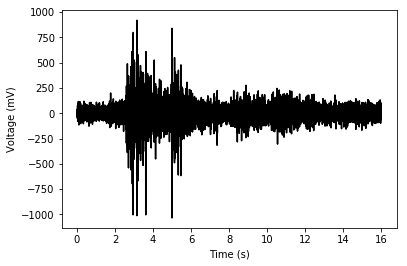

In [26]:
trace = df[df.task==TASK_NAME][setN][trialN][channelN]
time = np.linspace(0, round(np.size(trace)/fs), np.size(trace))

ax = plt.figure
plt.plot(time, trace, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Alternatively

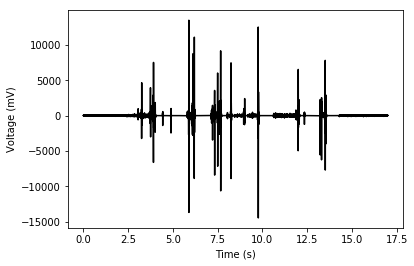

In [27]:
TASK_NAME = 'bottle'
trialN = 4
channelN = 'ch160'
df[df.task==TASK_NAME][channelN].iloc[trialN]

trace = df[df.task==TASK_NAME][channelN].iloc[trialN]
time = np.linspace(0, round(np.size(trace)/fs), np.size(trace))

ax = plt.figure
plt.plot(time, trace, color='k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

Time-step duration

In [28]:
#in bottle task, trial 3
print (df[df.task=='bottle'].t_steps.iloc[2])
print (df[df.task=='bottle']['t_steps'][3]) #index change

41598
33037


## Plot trials

### Layout reflecting electrode array disposition

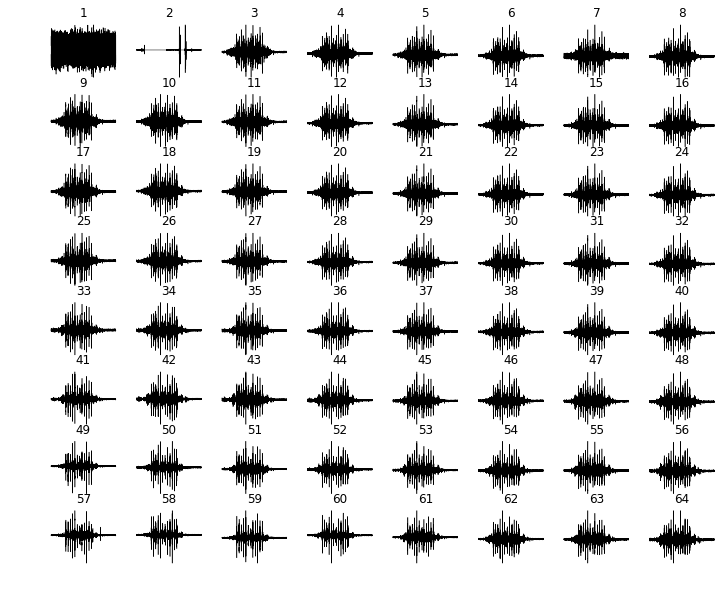

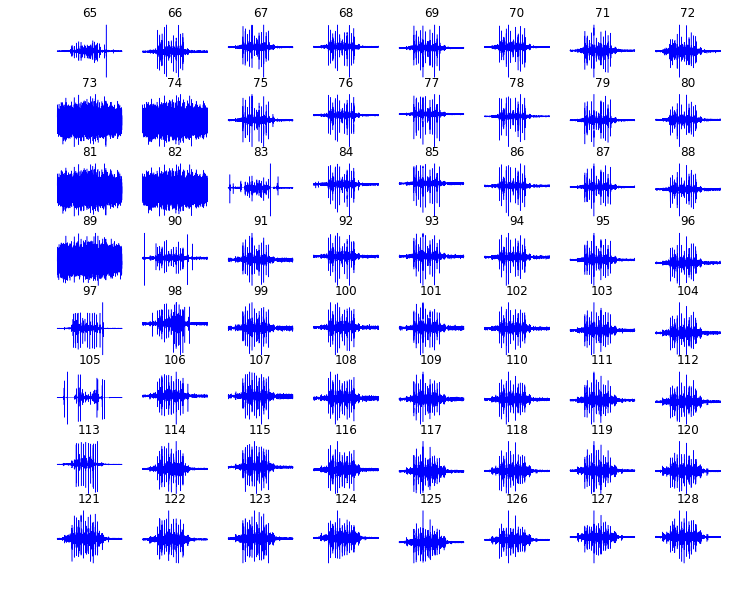

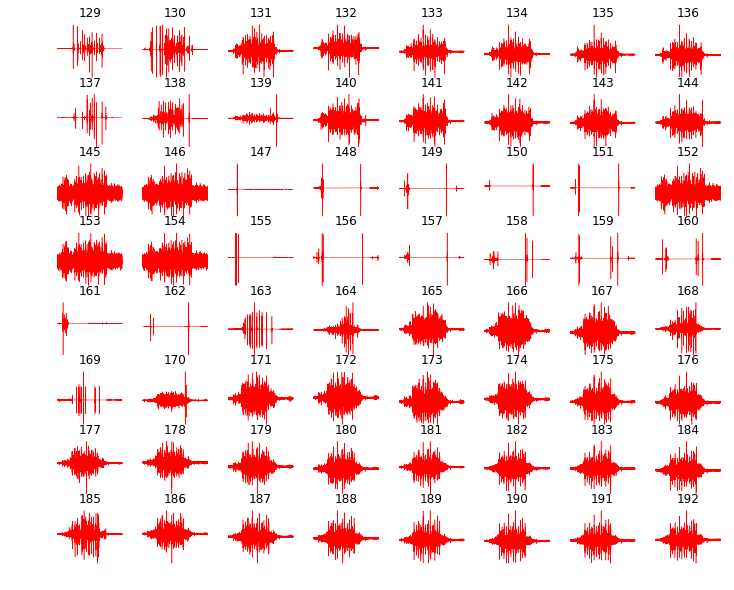

In [29]:
trialN = 9

plt.figure(figsize=(12, 10))

for ch in range(n_ch**2):
        
        channelN = 'ch'+str(ch+1)
        ax = plt.subplot(n_ch,n_ch,ch+1)
        ax.plot(df[channelN].loc[trialN],
                color='k',
                linewidth=.5)
        ax.set_axis_off()
        ax.set_title(ch+1)
        #ax.set_ylim([0, 200])
plt.tight_layout
plt.show()


plt.figure(figsize=(12, 10))

#for ch in range((n_ch**2),2*(n_ch**2)):
for ch in range(n_ch**2):
        
        channelN = 'ch'+str(ch+1+(n_ch**2))
        ax = plt.subplot(n_ch,n_ch,ch+1)
        ax.plot(df[channelN].loc[trialN],
                color='b',
                linewidth=.5)
        ax.set_axis_off()
        ax.set_title(ch+1+(n_ch**2))
        #ax.set_ylim([0, 200])
plt.tight_layout
plt.show()


plt.figure(figsize=(12, 10))

#for ch in range(2*(n_ch**2), n_ch_tot):
for ch in range(n_ch**2):
        
        channelN = 'ch'+str(ch+1+2*(n_ch**2))
        ax = plt.subplot(n_ch,n_ch,ch+1)
        ax.plot(df[channelN].loc[trialN],
                color='r',
                linewidth=.5)
        ax.set_axis_off()
        ax.set_title(ch+1+2*(n_ch**2))
        #ax.set_ylim([0, 200])
        
plt.tight_layout
plt.show()

Set channels with artefacts to NaN

In [ ]:
# This would set it only in the setN column, not the in the channel-wise dataframe
#trace = df[df.task==TASK_NAME][setN][trialN][1]
#trace = (np.nan,)*np.size(trace)

In [ ]:
#plt.figure(figsize=(12, 10))

#TASK_NAME = 'bottle'
#setN = 'set1'
#trialN = 3
#channelN = 54

#for i in range(n_ch**2):
        #if df[df.task==TASK_NAME][setN][trialN][i] < :
            #df[df.task==TASK_NAME][setN][trialN][i] = np.nan
        
        #ax = plt.subplot(n_ch,n_ch,i+1)
        #ax.plot(df[df.task==TASK_NAME][setN][trialN][i],
                #color='k',
                #linewidth=.5)
        #ax.set_axis_off()
        
#plt.tight_layout
#plt.show()

In [ ]:
ch = [
[8], #trial_0
[ ], #trial_1
[150, 151], #trial_2
[2, 137], #trial_3
[ ], #trial_4
[154, 155], #trial_5
[ ], #trial_6
[156, 157], #trial_7
[ ], #trial_8
[2, 137, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162], #trial_9
[ ], #trial_10
[ ], #trial_11
[ ], #trial_12
[ ], #trial_13
[ ], #trial_14
[158, 159], #trial_15
[ ], #trial_16
[ ], #trial_17
[ ], #trial_18
[ ], #trial_19
[ ], #trial_20
[ ], #trial_21
[ ], #trial_22
[ ], #trial_23
[ ], #trial_24
[ ], #trial_25
[ ], #trial_26
[ ], #trial_27
[ ], #trial_28
[ ], #trial_29
[ ], #trial_30
[ ], #trial_31
[ ], #trial_32
[ ], #trial_33
[2, 137, 147, 148, 149], #trial_34
]

Set new dataframe, only with channels as predictors (drop sets), adding deleted channels as columns

In [ ]:
columns = ['task','trial',
          't_steps', 'time_duration']#,

for i in range(n_ch_tot):
    columns.append('ch'+str(i+1),)

col = columns.copy()
col.append('ch_del')

In [ ]:
dfn = pd.DataFrame(columns=col)
df_temp = pd.DataFrame(columns=col)
#df_temp = pd.DataFrame(columns='ch_del')

dfn[columns] = df[columns].copy()

for trialN in range(1): #df.index: #range(1):
    
    file_name = file_list[trialN].replace('.mat', '_ch.csv')
    
    if len(ch[trialN]) > 0:
        for k in range(len(ch[trialN])):
            channelN = 'ch' + str(ch[trialN][k])
            trace = df[channelN].loc[trialN].copy()
            trace = (np.nan,)*np.size(trace)
            dfn[channelN].loc[trialN] = np.array(trace)
    
    dfn['ch_del'].loc[trialN] = ch[trialN]
    
    #df_temp = df_temp.append(dfn['ch_del'].loc[trialN].copy().T)
    df_temp = df_temp.append(dfn.loc[trialN].copy().T, ignore_index=True)
    df_temp.to_csv(file_name) #CHannels With Artifacts
    df_temp = df_temp.drop(df_temp.index[0])
    
    #np.savetxt(file_name, ch[trialN], delimiter=',')

Example to call file with dataframe containing single row of dfn (with deleted channels)

In [ ]:
df2 = pd.read_csv(file_name)
df2[df2.columns[1:]]
#df2 = df2[df2.columns[1:]].set_index(df2[df2.columns[0]])
df2

In [ ]:
df2['ch_del']

Alternative where the files produced only have the delete channels

In [ ]:
dfn = pd.DataFrame(columns=col)
df_temp = pd.DataFrame()

dfn[columns] = df[columns].copy()

for trialN in range(1): #df.index: #range(1):
    
    file_name = file_list[trialN].replace('.mat', '_ch2.csv')
    
    if len(ch[trialN]) > 0:
        for k in range(len(ch[trialN])):
            channelN = 'ch' + str(ch[trialN][k])
            trace = df[channelN].loc[trialN].copy()
            trace = (np.nan,)*np.size(trace)
            dfn[channelN].loc[trialN] = np.array(trace)
    
    dfn['ch_del'].loc[trialN] = ch[trialN]
    
    df_temp = df_temp.append({'ch_del': ch[trialN]}, ignore_index=True)
    df_temp.to_csv(file_name) #CHannels With Artifacts
    df_temp = df_temp.drop(df_temp.index[0])

In [ ]:
df3 = pd.read_csv(file_name)
df3 = df3[df3.columns[1:]]
#df3 = df3[df3.columns[1:]].set_index(df3[df3.columns[0]])
df3

# Time-frequency decomposition

In [36]:
dfn = df.copy()

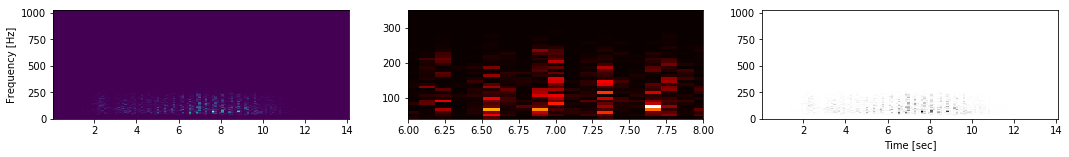

In [37]:
TASK_NAME = 'knife'
trialN = 3
channelN = 'ch10'

x = np.array(dfn[dfn.task==TASK_NAME][channelN].iloc[trialN])
#x = np.array(df[df.task==TASK_NAME][channelN].iloc[trialN])

f, t, Sxx = signal.spectrogram(x, fs)

plt.figure(figsize=(18, 2))
ax = plt.subplot(131)
plt.pcolormesh(t, f, Sxx)
ax.set_ylabel('Frequency [Hz]')

ax = plt.subplot(132)
plt.pcolormesh(t, f, Sxx, cmap='hot')
ax.set_ylim([40,350])
ax.set_xlim([6,8])

ax = plt.subplot(133)
plt.pcolormesh(t, f, Sxx, cmap='binary')

plt.xlabel('Time [sec]')
plt.show()

Compare trials over channels for one task (within subject)

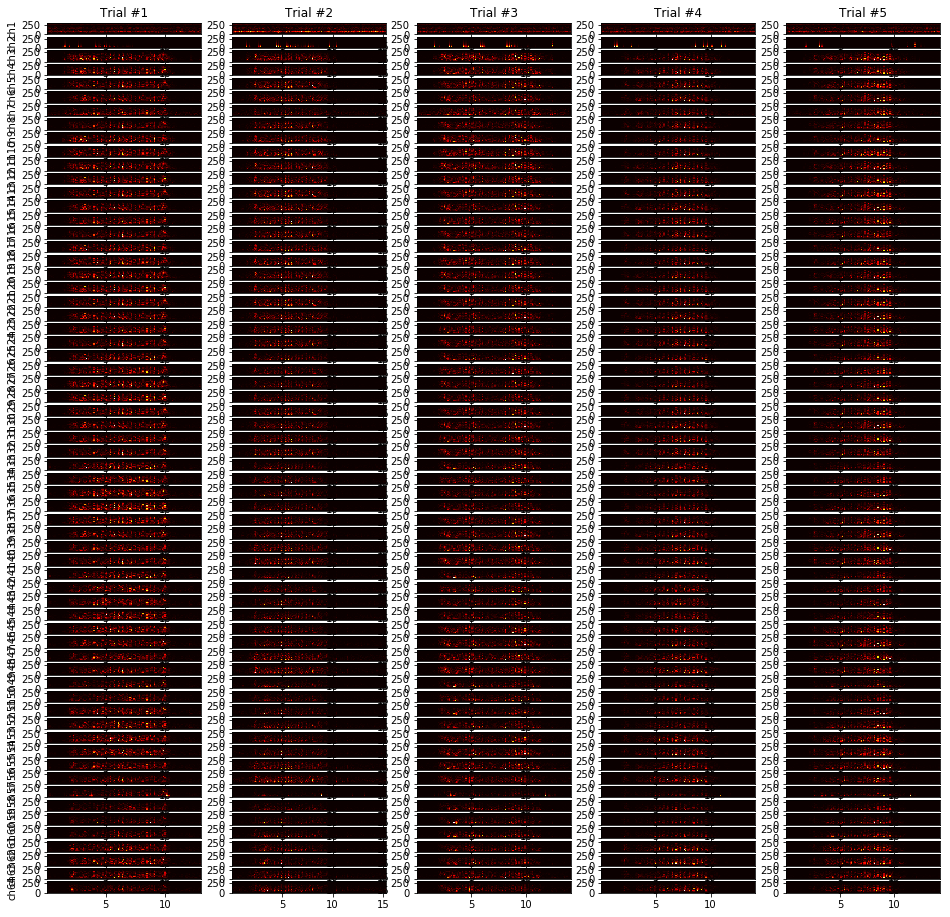

In [38]:
TASK_NAME = 'knife'
trialN_tot = np.size(dfn[dfn.task==TASK_NAME],0)

plt.figure(figsize=(16, 16))
 
#for ch in range(n_ch_tot): #each channel, rows
for ch in range(n_ch**2): #each channel, rows
    for trialN in range(trialN_tot): #each trial, columns
        
        ax = plt.subplot(n_ch**2, trialN_tot, trialN_tot*ch+trialN+1)
        #ax = plt.subplot(192, 5, 5*ch+trialN+1 )
        #ax = plt.subplot((n_ch_tot,np.size(dfn[dfn.task==TASK_NAME],0),trialN_tot*ch+trialN+1)
        
        channelN = 'ch'+str(ch+1)
        x = np.array(dfn[dfn.task==TASK_NAME][channelN].iloc[trialN])
        f, t, Sxx = signal.spectrogram(x, fs)
        ax.pcolormesh(t, f, Sxx, cmap='hot')
        ax.set_ylim([0, 300])
        
        if trialN == 0:
            ax.set_ylabel('ch'+str(ch+1))
            
        if ch == 0:
            ax.set_title('Trial #'+str(trialN+1))
        
        #ax.set_axis_off()
plt.tight_layout
plt.show()

It would be better to split on more columns, on a larger window.

Prediction with just action onset?

All matrix

In [47]:
trialN_tot = max(dfn.index)+1

t_W = 5
f_W = 16

time_dim = np.zeros((n_ch_tot, trialN_tot, t_W))
freq_dim = np.zeros((trialN_tot, n_ch_tot))

p_tot = f_W*t_W*n_ch_tot

dfn['pred'] = ''

for w in range(p_tot):
    dfn['p'+str(w)] = ''

for trialN in dfn.index: #each trial, columns
    
    F = []
    
    for chN, ch in enumerate(ch_col): #each channel, rows

        x = np.array(dfn[ch].loc[trialN])
        
        if np.isnan(x[0])==False:
            f, t, Sxx = signal.spectrogram(x, fs)
        
            ind = np.where(Sxx/np.max(Sxx) > 0.05) #5% threshold
            time_dim[chN, trialN, :] = np.unique(ind[0])[0:t_W]
            
            freq_dim[trialN, chN] = np.argmax(np.sum(Sxx[:, time_dim[chN,trialN,:].astype(int)], axis=1))
            W = np.reshape(Sxx[0:f_W, time_dim[chN,trialN,:].astype(int)], (t_W*f_W)) #time-frequency window of interest
            F.append(W)
        else:
            W = (np.nan,)*(t_W*f_W) #time-frequency window of interest
            F.append(W)
    
    dfn['pred'].loc[trialN] = np.reshape(F, p_tot)

dfn['freq'] = freq_dim.tolist()

C:\Users\HIWI\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


A column for each t-f pixel

In [48]:
p_col = dfn.columns[ dfn.columns.get_loc('p0') : dfn.columns.get_loc('p0') + p_tot]

In [49]:
dfn[p_col] = dfn['pred'].tolist()

Set ticks for heat map

In [50]:
yticks = []
yticks.append(np.size(dfn[dfn.task==task_names[0]].trial)/2)

for i in range(1, len(task_names)):
    yticks.append(np.size(dfn[dfn.task==task_names[i]].trial)/2+np.size(dfn[dfn.task==task_names[i-1]].trial)/2+yticks[i-1])

Plot heat map

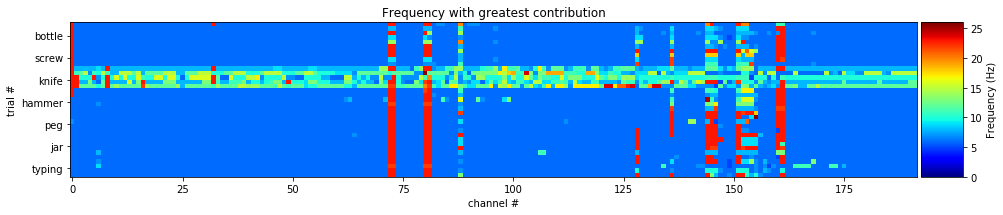

In [51]:
plt.figure(figsize=(16,40))
ax = plt.gca()

im = ax.imshow(freq_dim, interpolation='nearest', cmap=cm.jet, vmax=freq_dim.max(), vmin=0)
#im = ax.imshow(freq_dim, interpolation='nearest', cmap=cm.jet, vmax=10, vmin=0)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

ax.set_yticks(yticks)
ax.set_yticklabels(task_names)

plt.colorbar(im, cax=cax)
plt.ylabel('Frequency (Hz)')
ax.set_xlabel('channel #')
ax.set_ylabel('trial #')
ax.set_title('Frequency with greatest contribution')
plt.show()

- check time-frequency resolution in spectrogram (check time length from spectogram properties)
- create time-frequency window
- reshape it into array for prediction

## Classifiers

In [52]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

C:\Users\HIWI\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [53]:
predictors=p_col

In [54]:
X = dfn[predictors]
y = dfn['task']

In [55]:
X

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p15349,p15350,p15351,p15352,p15353,p15354,p15355,p15356,p15357,p15358
0,1.086542e-03,0.001220,1.683197e-05,0.011764,0.045634,0.001294,0.002431,0.002826,0.009964,0.000602,...,2.412825,4.039638,1.609664,0.035133,2.251248,3.243517,2.130414,0.023938,3.382612,1.149292
1,4.165989e-08,0.002909,6.912937e-03,0.007592,0.026074,0.000231,0.000130,0.004049,0.003437,0.002869,...,2.150401,0.969917,2.675944,11.494484,0.517629,1.989920,0.893838,5.529907,3.756028,0.365921
2,5.806635e-02,0.030139,1.668140e-02,0.005360,0.001511,0.003148,0.002158,0.003162,0.000162,0.000307,...,0.068427,0.435979,3.022784,13.696546,25.213808,1.143116,1.855609,1.518017,27.212513,26.273897
3,8.438711e-05,0.007998,9.127310e-03,0.000369,0.027225,0.001552,0.000124,0.002383,0.001302,0.002626,...,0.001594,0.464954,1.206088,1.129178,2.851261,0.415744,0.710184,1.427350,0.867247,0.833835
4,5.172590e-02,0.004553,1.625756e-03,0.000900,0.000039,0.003130,0.001430,0.000949,0.000598,0.000409,...,4.614768,0.319530,0.601378,0.170305,0.480986,7.146988,0.462012,1.108443,0.255569,0.143270
5,3.129422e-02,0.012902,3.885007e-03,0.062326,0.013279,0.004351,0.001383,0.001064,0.000746,0.004736,...,0.404712,0.440937,0.398651,0.181179,2.569482,0.639995,0.169500,0.420696,0.813844,1.210467
6,3.117923e-03,0.015042,1.788837e-02,0.001712,0.008100,0.000018,0.001646,0.000874,0.000927,0.001886,...,0.137311,0.020697,0.584658,0.492929,0.471451,3.268400,3.748147,0.375778,2.507792,1.172804
7,4.688994e-04,0.022476,8.354931e-07,0.002372,0.040318,0.003486,0.000733,0.001341,0.002624,0.000686,...,0.787234,0.255809,1.668699,0.002099,2.887980,1.178576,0.068051,2.146744,0.843904,1.665621
8,1.612469e-02,0.031863,8.806893e-03,0.005173,0.013788,0.000606,0.003753,0.001290,0.000703,0.001631,...,1.007513,0.345387,4.976161,0.508195,1.369599,3.154382,1.077862,1.358327,0.007055,1.701285
9,1.038857e-02,0.000878,3.732734e-02,0.003372,0.002327,0.001192,0.003492,0.004086,0.000369,0.003921,...,1.999366,0.630459,0.745246,0.308047,0.946826,0.787096,0.075213,0.450046,0.303952,0.193947


In [56]:
y

0     bottle
1     bottle
2     bottle
3     bottle
4     bottle
5      screw
6      screw
7      screw
8      screw
9      screw
10     knife
11     knife
12     knife
13     knife
14     knife
15    hammer
16    hammer
17    hammer
18    hammer
19    hammer
20       peg
21       peg
22       peg
23       peg
24       peg
25       jar
26       jar
27       jar
28       jar
29       jar
30    typing
31    typing
32    typing
33    typing
34    typing
Name: task, dtype: object

Use imputer from sklearn

In [57]:
#SVM = sklearn.svm.SVC(kernel='rbf')
#SVM.fit(X, y)  
#SVM.score(X,y)

rfc = RandomForestClassifier()
rfc.fit(X, y)
rfc.score(X,y)

1.0

In [58]:
#scoreSVM=([]);
scoreRFC=([]);

In [59]:
kf = KFold(n_splits=5) 
#KFold(n_splits=2, random_state=None, shuffle=False)

In [60]:
for train,test in kf.split(X):
    
    ## SVM
    #SVM =  sklearn.svm.SVC(kernel='rbf')
    #SVM.fit(X.iloc[train],y.iloc[train])
    #scoreSVM.append(SVM.score(X.iloc[test], y.iloc[test])) #accuracy
    
    ## RFC
    RFC =  RandomForestClassifier()
    RFC.fit(X.iloc[train],y.iloc[train])
    scoreRFC.append(RFC.score(X.iloc[test], y.iloc[test])) #accuracy

In [65]:
#print (np.mean(scoreSVM))
#print (np.std(scoreSVM))
#print ()
print (np.mean(scoreRFC))
print (np.std(scoreRFC))
print ('chance line=', 1/len(task_names))

0.14285714285714285
0.12777531299998798
chance line= 0.14285714285714285


With NaN, after artefact pre-processing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer

X_train = [[0, 0, np.nan], [np.nan, 1, 1]]
Y_train = [0, 1]
X_test_1 = [0, 0, np.nan]
X_test_2 = [0, np.nan, np.nan]
X_test_3 = [np.nan, 1, 1]

# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train_imp, Y_train)

for X_test in [X_test_1, X_test_2, X_test_3]:
    # Impute each test item, then predict
    X_test_imp = imp.transform(X_test)
    print(X_test, '->', clf.predict(X_test_imp))